In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

Here we obtain a random number from a normal distribution with mean 0 and standar deviation 0.2

In [2]:

random_from_normal_dist = np.random.normal(3, 10)
random_from_normal_dist

16.25378528939801

Argmax returns the position of the max number in an array.

In [3]:
np.argmax([1,0,5,6,10])

4

In [4]:
random.seed(10)

K = 10 # maquinas
N = 1000 # monedas - tiempo
epsilon = 0.2 # 0.1 de probabilidad de exploration
overall_rewards = []
rewards_over_time = []

# means and standar deviation for the K arms.
means = [5, 10, 20, 30, 40, 35, 60, 25, 19, 10]
std = [2, 10, 2, 3, 5, 4, 2, 1, 5, 2, 3]

print(means)
print(std)

[5, 10, 20, 30, 40, 35, 60, 25, 19, 10]
[2, 10, 2, 3, 5, 4, 2, 1, 5, 2, 3]


In [12]:
# return the reward for that action from its corresponding normal distribution (that corresponds to the slot machine)
def bandit(action):
    return np.random.normal(means[action], std[action])

def get_action(Q, epsilon):
    #explore
    if np.random.random() < epsilon:
        action = np.random.choice(len(Q))
    #exploit
    else:
        max = np.max(Q)
        max_actions = np.where(Q == max)[0]
        if len(max_actions) > 0:
            action = np.random.choice(max_actions)
        else:
            action = np.random.randint(0, len(Q)) #no choices available
    
    return action

def multi_armed_bandit(epsilon):
    Q = np.zeros(K)
    count = np.zeros(K)
    rewards_over_time = []
    for i in range(N):
        action = get_action(Q, epsilon)
        reward = bandit(action)
        rewards_over_time.append(reward)
        count[action] += 1
        #revisar
        #alpha = 1 / Q[action] #learning rate
        Q[action] = Q[action] + 1 
        Q[action] =  Q[action] + (1/ Q[action])* (reward - Q[action])
    
    overall_rewards.append(rewards_over_time)


In [13]:
# Average results
epsilons = [0.2]
results = []


for epsilon in epsilons:
    overall_rewards = []
    for i in range(1000):
        multi_armed_bandit(epsilon)
    results.append(np.mean(overall_rewards, axis=0))

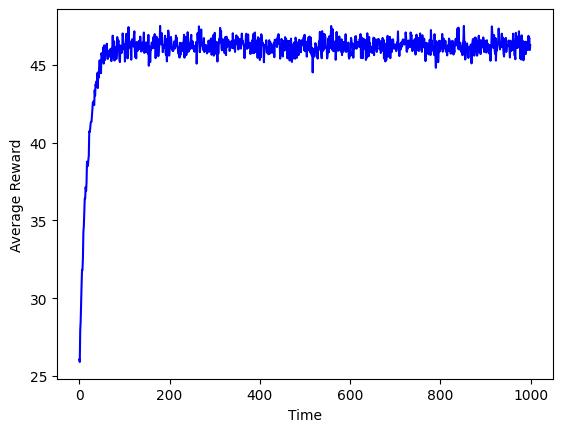

In [14]:
colors = ['blue']

x = [i for i in range(N)]
for i in range(len(epsilons)):
    plt.plot(x, results[i], color=colors[i])
    
plt.xlabel('Time')
plt.ylabel('Average Reward')
plt.show()

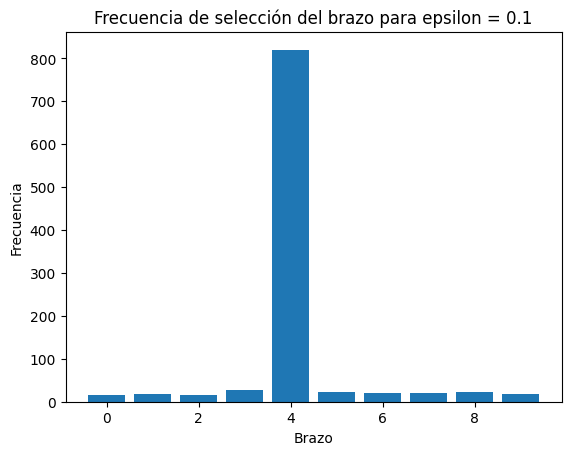

In [19]:
def multi_armed_bandit(epsilon):
    Q = np.zeros(K)
    count = np.zeros(K)
    rewards_over_time = []
    for i in range(N):
        action = get_action(Q, epsilon)
        reward = bandit(action)
        rewards_over_time.append(reward)
        count[action] += 1
        #revisar
        #alpha = 1 / Q[action] #learning rate
        Q[action] = Q[action] + 1 
        Q[action] =  Q[action] + (1/ Q[action])* (reward - Q[action])
    
    overall_rewards.append(rewards_over_time)
    
    return count

overall_rewards = []
for i in range(1):
        results = multi_armed_bandit(0.2)
plt.bar(range(K), results)
plt.title('Frecuencia de selección del brazo para epsilon = 0.1')
plt.xlabel('Brazo')
plt.ylabel('Frecuencia')
plt.show()

# Experimentos

1. ¿Qué pasa cuando epsilon={0, 0.1, 0.2, 0.3, 1}? Grafica avg reward vs time en un mismo plot para poder compararlos. ¿Cuál valor de épsilon es el óptimo? ¿Por qué?
3. Varía epsilon en el tiempo empezando en 1 (full exploration) y terminando en 0 (full exploitation) siguiendo la formula epsilon = 1/square_root(t) (Decreasing epsilon greedy). Grafica el average reward vs time para epsilon greedy y decreasing epsilon greedy en un mismo plot para compararlos. ¿Cuál obtiene más reward?
4. Grafica el número de veces que cada brazo fue seleccionado tras una sola llamada a multi_armed_bandit() con epsilon 0.1 y con epsilon = 1/square_root(t). ¿Cuál de ellos es el que fue seleccionado más/menos veces? ¿Por qué?

# 1

Epsilon 0:

![epsilon0](epsilon0.PNG)

Epsilon 0.1:

![epsilon0.1](epsilon01.PNG)

Epsilon 0.2:

![epsilon0.2](epsilon02.PNG)

Epsilon 0.3:

![epsilon0.3](epsilon03.PNG)

Epsilon 1:

![epsilon1](epsilon1.PNG)

donde podemos ver que Epsilon con un valor de 0.2 y 0.3 son los mejores con valores similares, pero epsilon con 0.3 es un poco mejor porque su average reward llega a valores superiores en menos tiempo.

# 2

![epsilon0and1](epsilon0and1.PNG)

como podemos ver en la imagen, cuando usamos epsilon de 0 y 1 no importa cuanto tiempo pase el average reward bajará y subirá aleatoriamente, no se entrena como en otros modelos ya que no tiene los pasos de entrenar y explotar a la vez, solo uno de ellos.



# 3

hacemos correr el codigo con 2 distintos epsilon, uno es 0.1 y el otro es 1/sqrt(t) donde nuestra T solo es 1 ya que lo hacemos correr una vez, con eso tenemos los siguientes resultados:

![Brazos01](Brazos01.PNG)

![Brazos1](Brazos1.PNG)

con nuestro primer modelo, se nota que selecciona uno de los brazos y se enfoca en mejorar ese brazo ya que ese es su maximo cuando epsilon es el valor 0.1. Mientras tanto en nuestro segundo modelo el valor de epsilon es 1 y por ende no tiene explotacion entonces se va seleccionando aleatoriamente un numero y por eso la cantidad de selecciones a un brazo distinto es similar, por que los elije aleatoriamente.